In [1]:
import pandas as pd
from IPython.display import display
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

dir_suffix = "data/"
dir_suffix_entpackt = dir_suffix + "Daten_ausgepackt/"

In [2]:
print("Tip25W Testdaten Template:")
testdata = pd.read_csv(dir_suffix+"tip25W_testdaten_template.csv")

display(testdata.head(12))

print("Tip25W Trainingsdaten:")
trainingdata = pd.read_csv(dir_suffix+"tip25W_trainingsdaten.csv")

testdaten = pd.read_csv(dir_suffix+"tip25W_testdaten_template.csv")
# ist das gleiche wie orders gefiltert nach nur prior und das gleiche wie der prior Datensatz
#trainingdata = trainingdata[:300000]
display(trainingdata.head(11))

print("Prior:")
df_orders_prior = pd.read_csv(dir_suffix_entpackt+ "order_products__prior.csv")
display(df_orders_prior.head(10))

print("train:")
df_orders_train = pd.read_csv(dir_suffix_entpackt + "order_products__train.csv")
display(df_orders_train)

print("orders")
df_orders = pd.read_csv(dir_suffix_entpackt + "orders.csv")
display(df_orders.head(10))

print("products:")
df_products = pd.read_csv(dir_suffix_entpackt + "products.csv")
display(df_products.head(10))



Tip25W Testdaten Template:


,Unnamed: 0,order_id,tip,tip_pc
0,10,1187899,NaN,NaN
1,25,1492625,NaN,NaN
2,49,2196797,NaN,NaN
3,74,525192,NaN,NaN
4,78,880375,NaN,NaN
5,82,1094988,NaN,NaN
6,88,1822501,NaN,NaN
7,115,1827621,NaN,NaN
8,129,2316178,NaN,NaN
9,200,2180313,NaN,NaN


Tip25W Trainingsdaten:


,Unnamed: 0,order_id,tip,tip_pc
0,0,2539329,True,0.092177
1,1,2398795,False,0.000000
2,2,473747,False,0.000000
3,3,2254736,True,0.102231
4,4,431534,True,0.092990
5,5,3367565,False,0.000000
6,6,550135,False,0.000000
7,7,3108588,False,0.000000
8,8,2295261,False,0.000000
9,9,2550362,False,0.000000


Prior:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


train:


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


products:


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [3]:


"""
große Tablle erzeugen die alle basis Informationen enthält und die Verbindung zwischen User seinen Orders und dessen Inhalt
"""
merged = trainingdata.merge(df_orders_prior, on="order_id", how="left")
merged = merged.merge(df_orders, on="order_id", how="left")

merged = merged.fillna(0)

#order_merged = order_merged.merge(df_products, on="product_id", how="left")
"""Wir benötigen numerische Werte desswegen werden die nan ersetzt"""
display(merged.head(5))

,Unnamed: 0,order_id,tip,tip_pc,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,2539329,True,0.092177,196,1,0,1,prior,1,2,8,0.0
1,0,2539329,True,0.092177,14084,2,0,1,prior,1,2,8,0.0
2,0,2539329,True,0.092177,12427,3,0,1,prior,1,2,8,0.0
3,0,2539329,True,0.092177,26088,4,0,1,prior,1,2,8,0.0
4,0,2539329,True,0.092177,26405,5,0,1,prior,1,2,8,0.0


In [4]:


"""
erstellung der Features pro User pro order 
    eine Zeile Pro Bestellung
"""
order_features = (
    df_orders_prior
    .groupby("order_id")
    .agg(
        num_products=("product_id", "count"),
        num_reordered=("reordered", "sum"),
        avg_add_to_cart=("add_to_cart_order", "mean"),
        max_add_to_cart=("add_to_cart_order", "max"),
    )
    .reset_index()
)
"""Zugehörigkeit der Bestellungen zu den jeweiligen Departments der Bestellung """
prior_with_dept = df_orders_prior.merge(
    df_products[["product_id", "department_id"]],
    on="product_id",
    how="left"
)
"""Wie viele Produkte wurden in der jeweiligen Bestellung aus welchem Department bestellt """
dept_counts = (
    prior_with_dept
    .groupby(["order_id", "department_id"])
    .size()
    .unstack(fill_value=0)
)
""" hier werden die Departments "one hot encoded" aber als wert ist der Item Count pro Departmetn der Bestellung enthalten (wird später zu Anteilen geändert)"""

dept_counts.columns = [f"department_id_{int(c)}" for c in dept_counts.columns]
dept_counts = dept_counts.reset_index()

order_features = order_features.merge(
    dept_counts,
    on="order_id",
    how="left"
)

""" Hier werden die bisherigen Werte und DF mit den orders und den Trainigsdaten vereint um die Daten zu zentralisieren"""

order_features = order_features.merge(
    df_orders,
    on="order_id",
    how="left"
)

final_df = order_features.merge(
    trainingdata[["order_id", "tip", "tip_pc"]],
    on="order_id",
    how="left"
)

""" Hier werden die Zyklischen Features wie Day Of Week und Order Hour encoded

    One Hot encoding wurde auch versucht hat aber zu minimal schlechteren Ergebnissen geführt
    Da Stunden des Tages ein 24h Zyklus sind setzt man die Werte in den Einheitskreis um so zu verhuindern dass stunde 23 wichtiger erscheint wie Stunde 3 (id Problem)
"""
final_df["order_dow_sin"] = np.sin(2 * np.pi * final_df["order_dow"] / 7)
final_df["order_dow_cos"] = np.cos(2 * np.pi * final_df["order_dow"] / 7)

# Stunde (0–23)
final_df["order_hour_sin"] = np.sin(2 * np.pi * final_df["order_hour_of_day"] / 24)
final_df["order_hour_cos"] = np.cos(2 * np.pi * final_df["order_hour_of_day"] / 24)

""" df_day_encoded = pd.get_dummies(final_df, columns=["order_dow"], prefix="dow",drop_first=False)
df_day_encoded

df_encoded_final = pd.get_dummies(df_day_encoded, columns=["order_hour_of_day"], prefix="hour",drop_first=False)
df_encoded_final
df_encoded_final.head(10) """


' df_day_encoded = pd.get_dummies(final_df, columns=["order_dow"], prefix="dow",drop_first=False)\ndf_day_encoded\n\ndf_encoded_final = pd.get_dummies(df_day_encoded, columns=["order_hour_of_day"], prefix="hour",drop_first=False)\ndf_encoded_final\ndf_encoded_final.head(10) '

In [5]:
df = final_df.copy()
#sortiere die Orders pro user und nach Bestellung pro User
df = df.sort_values(["user_id", "order_number"]).reset_index(drop=True)

""" vorherige Tip des Users immer die letzte nicht die neuste um leakage zu verhindern"""
#hat der user in seiner letzten Bestellung ein Tip gegeben oder nicht
tip_past = df.groupby("user_id")["tip"].shift(1).astype("float")
df["tip_last_order"] = tip_past.fillna(0).astype(int)

""" vorherige Tip Prozent des Users """
# wie viel % hat der User in seiner letzten Bestellung getipt 
tip_past_pc = df.groupby("user_id")["tip_pc"].shift(1).astype("float")
df["tip_last_order_pc"] = (tip_past_pc * 100).fillna(0).round(0).astype(int)

""" features für User Tip und Tip PC berechnen /agg"""
#summe seiner vergangenen Tip Pc über alle seine Bestellungen
df["tips_past_pc"] = df["tip_last_order_pc"].groupby(df["user_id"]).cumsum()
# summe der Orders in der Vergangenheit bei denen er ein Tip gegeben hat
df["tips_past"] = df["tip_last_order"].groupby(df["user_id"]).cumsum()
# Wie viele Bestellungen hatte der User bisher
df["orders_past"] = tip_past.groupby(df["user_id"]).cumcount()
# Anteil der vergangenen Orders bei denen getipt wurde pre User
df["tip_rate_past"] = (df["tips_past"] / df["orders_past"]).where(df["orders_past"] > 0, 0.0)
# Durchschnittliche Tip PC über alle vergangenen Orders
df["tip_rate_past_pc"] = (df["tips_past_pc"] / df["orders_past"]).where(df["orders_past"] > 0, 0.0)

""" wie viele Tips hat der User in seinen vorhergehenden 3 Bestellungen gegeben"""
tips_3 = (
    tip_past
    .groupby(df["user_id"])
    .rolling(window=3, min_periods=1)
    .sum()
    .reset_index(level=0, drop=True)
)
# teilwert wie viele vergangene werden betrachtet 
# bei 0rder 1  = 0
# bei Order 2 = 1
# bei Order 3 = 2
# ab Order 4 = 3 immer 3 wegen Window
orders_3 = (
    tip_past
    .groupby(df["user_id"])
    .rolling(window=3, min_periods=1)
    .count()
    .reset_index(level=0, drop=True)
)
# wie hoch war die Tip Rate beim User in den letzten 3 Bestellungen 
df["tip_rate_past_3"] = (tips_3 / orders_3).where(orders_3 > 0, 0.0)
# Der Anteil wie viele PRodukte sind wiederbestellungen 
df["reorder_ratio"] = (df["num_reordered"] / df["num_products"].replace(0, 1)) * 100

df.head(20)

,order_id,num_products,num_reordered,avg_add_to_cart,max_add_to_cart,department_id_1,department_id_2,department_id_3,department_id_4,department_id_5,...,order_hour_cos,tip_last_order,tip_last_order_pc,tips_past_pc,tips_past,orders_past,tip_rate_past,tip_rate_past_pc,tip_rate_past_3,reorder_ratio
0,2539329,5,0,3.0,5,0,0,0,0,0,...,-0.500000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,2398795,6,3,3.5,6,0,0,0,1,0,...,-0.258819,1,9,9,1,1,1.000000,9.000000,1.000000,50.000000
2,473747,5,3,3.0,5,0,0,0,0,0,...,-1.000000,0,0,9,1,2,0.500000,4.500000,0.500000,60.000000
3,2254736,5,5,3.0,5,0,0,0,0,0,...,-0.258819,0,0,9,1,3,0.333333,3.000000,0.333333,100.000000
4,431534,8,5,4.5,8,0,0,0,4,0,...,-0.707107,1,10,19,2,4,0.500000,4.750000,0.333333,62.500000
5,3367565,4,4,2.5,4,0,0,0,0,0,...,-0.258819,1,9,28,3,5,0.600000,5.600000,0.666667,100.000000
6,550135,5,5,3.0,5,0,0,0,0,0,...,-0.707107,0,0,28,3,6,0.500000,4.666667,0.666667,100.000000
7,3108588,6,4,3.5,6,0,0,0,0,0,...,-0.866025,0,0,28,3,7,0.428571,4.000000,0.333333,66.666667
8,2295261,6,6,3.5,6,0,0,0,0,0,...,-0.500000,0,0,28,3,8,0.375000,3.500000,0.000000,100.000000
9,2550362,9,6,5.0,9,0,0,0,0,0,...,-0.500000,0,0,28,3,9,0.333333,3.111111,0.000000,66.666667


In [6]:
df[[
    "num_products",
    "tip_pc",
    "orders_past",
    "tip_rate_past_pc"
]].describe(percentiles=[.01, .05, .95, .99])

,num_products,tip_pc,orders_past,tip_rate_past_pc
count,3.214874e+06,3.214874e+06,3.214874e+06,3.214874e+06
mean,1.008888e+01,7.790044e-02,1.619107e+01,7.323707e+00
std,7.525398e+00,6.578102e-02,1.779950e+01,5.236399e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+00,1.023381e-01,1.000000e+01,7.588235e+00
95%,2.500000e+01,1.638294e-01,5.400000e+01,1.500000e+01
99%,3.500000e+01,1.806936e-01,8.100000e+01,1.600000e+01
max,1.450000e+02,2.386808e-01,9.800000e+01,2.300000e+01


In [ ]:
dept_cols = [c for c in df.columns if c.startswith("department_id_")]

display(dept_cols)
# Anzahl der Bestellungen Pro Department
dep_tip_count = (
    df[dept_cols].gt(0)
    .astype(int)
    .sum()
)
# Durchschnittliche Tip im Department 
avg_tip_per_dept = (
    df[dept_cols].gt(0)
    .astype(int)
    .multiply(df["tip_pc"], axis=0)
    .sum()
    /dep_tip_count
)


df["avg_tip_per_dept"] = avg_tip_per_dept

for elem in dept_cols:
    df[elem.replace("department_id_", "dept_share_")] = df[elem] / df["num_products"]
df.drop(columns=dept_cols, inplace=True)


['department_id_1',
 'department_id_2',
 'department_id_3',
 'department_id_4',
 'department_id_5',
 'department_id_6',
 'department_id_7',
 'department_id_8',
 'department_id_9',
 'department_id_10',
 'department_id_11',
 'department_id_12',
 'department_id_13',
 'department_id_14',
 'department_id_15',
 'department_id_16',
 'department_id_17',
 'department_id_18',
 'department_id_19',
 'department_id_20',
 'department_id_21']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
3214869   NaN
3214870   NaN
3214871   NaN
3214872   NaN
3214873   NaN
Name: avg_tip_per_dept, Length: 3214874, dtype: float64

In [8]:
"""
Hier bauen wir ein df zusammen, um Vorhersagen machen zu können. Wir berechnen also unsere selbst entwickelten features, z.b. die Bestellhistory des users
"""
def create_feature_df():
    merged = testdaten.merge(df_orders_train, on="order_id", how="left")
    merged = merged.merge(df_orders, on="order_id", how="left")

    merged = merged.fillna(0)

    #order_merged = order_merged.merge(df_products, on="product_id", how="left")
    display(merged.head(5))
    print(merged["eval_set"].unique())
    
    order_features = (
        df_orders_train
        .groupby("order_id")
        .agg(
            num_products=("product_id", "count"),
            num_reordered=("reordered", "sum")
        )
        .reset_index()
    )
    print("order_features:")
    display(order_features)

    prior_with_dept = df_orders_train.merge(
        df_products[["product_id", "department_id"]],
        on="product_id",
        how="left"
    )

    dept_counts = (
        prior_with_dept
        .groupby(["order_id", "department_id"])
        .size()
        .unstack(fill_value=0)
    )

    dept_counts.columns = [f"department_id_{int(c)}" for c in dept_counts.columns]
    dept_counts = dept_counts.reset_index()

    order_features = order_features.merge(
        dept_counts,
        on="order_id",
        how="left"
    )



    order_features = order_features.merge(
        df_orders,
        on="order_id",
        how="left"
    )

    final_df = order_features.merge(
        trainingdata[["order_id", "tip", "tip_pc"]],
        on="order_id",
        how="left"
    )
    final_df["order_dow_sin"] = np.sin(2 * np.pi * final_df["order_dow"] / 7)
    final_df["order_dow_cos"] = np.cos(2 * np.pi * final_df["order_dow"] / 7)

    # Stunde (0–23)
    final_df["order_hour_sin"] = np.sin(2 * np.pi * final_df["order_hour_of_day"] / 24)
    final_df["order_hour_cos"] = np.cos(2 * np.pi * final_df["order_hour_of_day"] / 24)



    # Bis hierhin passt es erstmal ---------------------------------------------------------------------------
    df_copy = df.copy()
    df_copy = df_copy.sort_values(["user_id", "order_number"])

    df_test_final = final_df.copy()

    df_prev = df_copy.copy()
    df_prev["order_number"] = df_prev["order_number"] + 1

    df_test_final = df_test_final.merge(
        df_prev[["user_id", "order_number", "tip_last_order", "tip_last_order_pc", "tips_past","tips_past_pc", "orders_past", "tip_rate_past", "tip_rate_past_pc", "tip_rate_past_3", "reorder_ratio"]],
        on=["user_id", "order_number"],
        how="left"
    )
    

    dept_cols = [c for c in df_test_final.columns if c.startswith("department_id_")]

    display(dept_cols)

    dep_tip_count = (
        df_test_final[dept_cols].gt(0)
        .astype(int)
        .sum()
    )

    avg_tip_per_dept = (
        df_test_final[dept_cols].gt(0)
        .astype(int)
        .multiply(df_copy["tip_pc"], axis=0)
        .sum()
        /dep_tip_count
    )


    df_test_final["avg_tip_per_dept"] = avg_tip_per_dept

    for elem in dept_cols:
        df_test_final[elem.replace("department_id_", "dept_share_")] = df_test_final[elem] / df_test_final["num_products"]
    df_test_final.drop(columns=dept_cols, inplace=True)

    display(df_test_final.head(20))
    df_test_final = df_test_final.drop(["user_id","eval_set", "order_dow", "order_hour_of_day"],axis=1)

    return df_test_final



In [9]:
display(merged.head(1))
df_finish = create_feature_df()
df = df.drop(["order_id", "avg_add_to_cart","max_add_to_cart", "user_id","eval_set", "order_dow", "order_hour_of_day"],axis=1)
display(df)
order_df = df
order_df = order_df.fillna(0)
df_finish = df_finish.fillna(0)

,Unnamed: 0,order_id,tip,tip_pc,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,2539329,True,0.092177,196,1,0,1,prior,1,2,8,0.0


,Unnamed: 0,order_id,tip,tip_pc,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,10,1187899,0.0,0.0,196,1,1,1,train,11,4,8,14.0
1,10,1187899,0.0,0.0,25133,2,1,1,train,11,4,8,14.0
2,10,1187899,0.0,0.0,38928,3,1,1,train,11,4,8,14.0
3,10,1187899,0.0,0.0,26405,4,1,1,train,11,4,8,14.0
4,10,1187899,0.0,0.0,39657,5,1,1,train,11,4,8,14.0


['train']
order_features:


,order_id,num_products,num_reordered
0,1,8,4
1,36,8,6
2,38,9,1
3,96,7,5
4,98,49,45
...,...,...,...
131204,3421049,6,1
131205,3421056,5,3
131206,3421058,8,7
131207,3421063,4,4


['department_id_1',
 'department_id_2',
 'department_id_3',
 'department_id_4',
 'department_id_5',
 'department_id_6',
 'department_id_7',
 'department_id_8',
 'department_id_9',
 'department_id_10',
 'department_id_11',
 'department_id_12',
 'department_id_13',
 'department_id_14',
 'department_id_15',
 'department_id_16',
 'department_id_17',
 'department_id_18',
 'department_id_19',
 'department_id_20',
 'department_id_21']

,order_id,num_products,num_reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,...,dept_share_12,dept_share_13,dept_share_14,dept_share_15,dept_share_16,dept_share_17,dept_share_18,dept_share_19,dept_share_20,dept_share_21
0,1,8,4,112108,train,4,4,10,9.0,NaN,...,0.000000,0.000000,0.000000,0.125000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000
1,36,8,6,79431,train,23,6,18,30.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.000000,0.125000,0.000000
2,38,9,1,42756,train,6,6,16,24.0,NaN,...,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000
3,96,7,5,17227,train,7,6,20,30.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000
4,98,49,45,56463,train,41,3,8,14.0,NaN,...,0.020408,0.081633,0.000000,0.163265,0.224490,0.102041,0.000000,0.020408,0.061224,0.000000
5,112,11,3,125030,train,5,5,14,26.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000
6,170,17,6,182389,train,7,0,13,14.0,NaN,...,0.000000,0.058824,0.000000,0.000000,0.117647,0.000000,0.000000,0.176471,0.000000,0.000000
7,218,5,2,98711,train,12,0,21,17.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,226,13,4,51011,train,4,0,12,30.0,NaN,...,0.000000,0.000000,0.000000,0.000000,0.153846,0.230769,0.076923,0.000000,0.000000,0.076923
9,349,11,5,156353,train,9,3,16,30.0,NaN,...,0.272727,0.000000,0.000000,0.000000,0.363636,0.090909,0.000000,0.000000,0.000000,0.000000


,num_products,num_reordered,order_number,days_since_prior_order,tip,tip_pc,order_dow_sin,order_dow_cos,order_hour_sin,order_hour_cos,...,dept_share_12,dept_share_13,dept_share_14,dept_share_15,dept_share_16,dept_share_17,dept_share_18,dept_share_19,dept_share_20,dept_share_21
0,5,0,1,NaN,True,0.092177,0.974928,-0.222521,8.660254e-01,-5.000000e-01,...,0.0,0.000000,0.000000,0.0,0.200000,0.200000,0.0,0.400000,0.000,0.0
1,6,3,2,15.0,False,0.000000,0.433884,-0.900969,9.659258e-01,-2.588190e-01,...,0.0,0.000000,0.166667,0.0,0.000000,0.000000,0.0,0.500000,0.000,0.0
2,5,3,3,21.0,False,0.000000,0.433884,-0.900969,1.224647e-16,-1.000000e+00,...,0.0,0.200000,0.000000,0.0,0.200000,0.000000,0.0,0.400000,0.000,0.0
3,5,5,4,29.0,True,0.102231,-0.433884,-0.900969,9.659258e-01,-2.588190e-01,...,0.0,0.000000,0.000000,0.0,0.200000,0.200000,0.0,0.400000,0.000,0.0
4,8,5,5,28.0,True,0.092990,-0.433884,-0.900969,-7.071068e-01,-7.071068e-01,...,0.0,0.000000,0.000000,0.0,0.125000,0.000000,0.0,0.250000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214869,3,3,9,22.0,True,0.079414,-0.433884,-0.900969,-7.071068e-01,-7.071068e-01,...,0.0,0.000000,0.000000,0.0,0.000000,0.666667,0.0,0.000000,0.000,0.0
3214870,9,3,10,29.0,False,0.000000,-0.974928,-0.222521,-1.000000e+00,-1.836970e-16,...,0.0,0.111111,0.111111,0.0,0.111111,0.111111,0.0,0.111111,0.000,0.0
3214871,8,6,11,30.0,False,0.000000,-0.433884,-0.900969,5.000000e-01,-8.660254e-01,...,0.0,0.000000,0.000000,0.0,0.250000,0.125000,0.0,0.125000,0.125,0.0
3214872,20,14,12,18.0,False,0.000000,0.781831,0.623490,1.224647e-16,-1.000000e+00,...,0.0,0.050000,0.100000,0.0,0.200000,0.150000,0.0,0.050000,0.050,0.0


C:\Users\Matte\AppData\Local\Temp\ipykernel_45796\1851819449.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_finish = df_finish.fillna(0)


In [10]:

"""
Wir teilen unsere Daten in train/test, um sehen zu können wie gut unsere Modelle abschneiden.
es wird in y_tip und y_pc unterschieden, da das Logistische Modell Tip 0/1 vorhersagt und das regresssionsmodell die tip percentage.
"""
X_base = order_df.drop(columns=["tip", "tip_pc"])
y_tip = order_df["tip"].astype(int)
y_tip_pc = order_df["tip_pc"]

X_train, X_test, y_tip_train, y_tip_test, y_pc_train, y_pc_test = train_test_split(
    X_base, y_tip, y_tip_pc,
    test_size=0.2,
    random_state=42
)
X_train_base = X_train.copy()
X_test_base  = X_test.copy()


In [11]:
"""Hier wird erstmal das Logistische Modell trainiert -> die Prediction wird nachher im 2ten Modell verwendet."""
from sklearn.metrics import accuracy_score


log_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(max_iter=2000))
    ]
)

log_pipeline.fit(X_train, y_tip_train)
y_pred_log  = log_pipeline.predict(X_test)

print("LogReg Accuracy:", accuracy_score(y_tip_test, y_pred_log))

LogReg Accuracy: 0.7691838718457171


In [12]:
df_finish = df_finish.set_index("order_id")
"""Hier machen wir schonmal predicts für die Daten in tip25W_testdaten_template"""
def predict_tip():
    feature_names = log_pipeline.feature_names_in_
    pred_df = df_finish.drop(columns=["tip", "tip_pc"])
    pred_df = pred_df[feature_names]
    pred_df["tip_hat"]  = log_pipeline.predict(pred_df).astype(int)
    display(pred_df.head(10))
    return pred_df
    


In [13]:
X_train = X_train.copy()
X_train["tip_hat"] = log_pipeline.predict(X_train)
X_test = X_test.copy()
X_test["tip_hat"] = log_pipeline.predict(X_test)


In [14]:
"""Jetzt trainieren wir ein Regressions Modell, um tip_pc vorherzusagen"""
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

reg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("linreg", LinearRegression())
    ]
)

reg_pipeline.fit(X_train, y_pc_train)

y_pc_pred = reg_pipeline.predict(X_test)

#y_pc_pred[X_test["tip_hat"] == 0] = 0.0
print("MAE:", mean_absolute_error(y_pc_test, y_pc_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_pc_test, y_pc_pred)))
print("R²:", r2_score(y_pc_test, y_pc_pred))

MAE: 0.0395837298758064
RMSE: 0.049041659168991926
R²: 0.44387691578000854


In [15]:
predict = predict_tip()
feature_names_reg = reg_pipeline.feature_names_in_
predict = predict[feature_names_reg]
predict["tip_pc"]  = reg_pipeline.predict(predict).astype(float)
display(predict.head(10))


,num_products,num_reordered,order_number,days_since_prior_order,order_dow_sin,order_dow_cos,order_hour_sin,order_hour_cos,tip_last_order,tip_last_order_pc,...,dept_share_13,dept_share_14,dept_share_15,dept_share_16,dept_share_17,dept_share_18,dept_share_19,dept_share_20,dept_share_21,tip_hat
order_id,,,,,,,,,,,,,,,,,,,,,
1,8,4,4,9.0,-0.433884,-0.900969,5.000000e-01,-8.660254e-01,1,17,...,0.000000,0.0,0.125000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,1
36,8,6,23,30.0,-0.781831,0.623490,-1.000000e+00,-1.836970e-16,1,9,...,0.000000,0.0,0.000000,0.375000,0.000000,0.000000,0.000000,0.125000,0.000000,1
38,9,1,6,24.0,-0.781831,0.623490,-8.660254e-01,-5.000000e-01,0,0,...,0.111111,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0
96,7,5,7,30.0,-0.781831,0.623490,-8.660254e-01,5.000000e-01,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0
98,49,45,41,14.0,0.433884,-0.900969,8.660254e-01,-5.000000e-01,1,14,...,0.081633,0.0,0.163265,0.224490,0.102041,0.000000,0.020408,0.061224,0.000000,1
112,11,3,5,26.0,-0.974928,-0.222521,-5.000000e-01,-8.660254e-01,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0
170,17,6,7,14.0,0.000000,1.000000,-2.588190e-01,-9.659258e-01,0,0,...,0.058824,0.0,0.000000,0.117647,0.000000,0.000000,0.176471,0.000000,0.000000,0
218,5,2,12,17.0,0.000000,1.000000,-7.071068e-01,7.071068e-01,1,16,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
226,13,4,4,30.0,0.000000,1.000000,1.224647e-16,-1.000000e+00,0,0,...,0.000000,0.0,0.000000,0.153846,0.230769,0.076923,0.000000,0.000000,0.076923,0


,num_products,num_reordered,order_number,days_since_prior_order,order_dow_sin,order_dow_cos,order_hour_sin,order_hour_cos,tip_last_order,tip_last_order_pc,...,dept_share_14,dept_share_15,dept_share_16,dept_share_17,dept_share_18,dept_share_19,dept_share_20,dept_share_21,tip_hat,tip_pc
order_id,,,,,,,,,,,,,,,,,,,,,
1,8,4,4,9.0,-0.433884,-0.900969,5.000000e-01,-8.660254e-01,1,17,...,0.0,0.125000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.141936
36,8,6,23,30.0,-0.781831,0.623490,-1.000000e+00,-1.836970e-16,1,9,...,0.0,0.000000,0.375000,0.000000,0.000000,0.000000,0.125000,0.000000,1,0.076255
38,9,1,6,24.0,-0.781831,0.623490,-8.660254e-01,-5.000000e-01,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0,0.019776
96,7,5,7,30.0,-0.781831,0.623490,-8.660254e-01,5.000000e-01,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0,0.026756
98,49,45,41,14.0,0.433884,-0.900969,8.660254e-01,-5.000000e-01,1,14,...,0.0,0.163265,0.224490,0.102041,0.000000,0.020408,0.061224,0.000000,1,0.123351
112,11,3,5,26.0,-0.974928,-0.222521,-5.000000e-01,-8.660254e-01,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0,-0.003359
170,17,6,7,14.0,0.000000,1.000000,-2.588190e-01,-9.659258e-01,0,0,...,0.0,0.000000,0.117647,0.000000,0.000000,0.176471,0.000000,0.000000,0,0.028870
218,5,2,12,17.0,0.000000,1.000000,-7.071068e-01,7.071068e-01,1,16,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.149936
226,13,4,4,30.0,0.000000,1.000000,1.224647e-16,-1.000000e+00,0,0,...,0.0,0.000000,0.153846,0.230769,0.076923,0.000000,0.000000,0.076923,0,0.024447


In [16]:
predict.rename(columns={"tip_hat": "tip"}, inplace=True)
predict.head(10)


,num_products,num_reordered,order_number,days_since_prior_order,order_dow_sin,order_dow_cos,order_hour_sin,order_hour_cos,tip_last_order,tip_last_order_pc,...,dept_share_14,dept_share_15,dept_share_16,dept_share_17,dept_share_18,dept_share_19,dept_share_20,dept_share_21,tip,tip_pc
order_id,,,,,,,,,,,,,,,,,,,,,
1,8,4,4,9.0,-0.433884,-0.900969,5.000000e-01,-8.660254e-01,1,17,...,0.0,0.125000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.141936
36,8,6,23,30.0,-0.781831,0.623490,-1.000000e+00,-1.836970e-16,1,9,...,0.0,0.000000,0.375000,0.000000,0.000000,0.000000,0.125000,0.000000,1,0.076255
38,9,1,6,24.0,-0.781831,0.623490,-8.660254e-01,-5.000000e-01,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0,0.019776
96,7,5,7,30.0,-0.781831,0.623490,-8.660254e-01,5.000000e-01,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0,0.026756
98,49,45,41,14.0,0.433884,-0.900969,8.660254e-01,-5.000000e-01,1,14,...,0.0,0.163265,0.224490,0.102041,0.000000,0.020408,0.061224,0.000000,1,0.123351
112,11,3,5,26.0,-0.974928,-0.222521,-5.000000e-01,-8.660254e-01,0,0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0,-0.003359
170,17,6,7,14.0,0.000000,1.000000,-2.588190e-01,-9.659258e-01,0,0,...,0.0,0.000000,0.117647,0.000000,0.000000,0.176471,0.000000,0.000000,0,0.028870
218,5,2,12,17.0,0.000000,1.000000,-7.071068e-01,7.071068e-01,1,16,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.149936
226,13,4,4,30.0,0.000000,1.000000,1.224647e-16,-1.000000e+00,0,0,...,0.0,0.000000,0.153846,0.230769,0.076923,0.000000,0.000000,0.076923,0,0.024447


In [17]:
"""Hier schreiben wir die Daten dann in ein csv, basierend auf dem template."""
testdata_clean = pd.read_csv(dir_suffix+"tip25W_testdaten_template.csv")
testdata_clean.head(10)
testdata_clean = testdata_clean.drop(columns = ["tip", "tip_pc"])
testdata_clean = testdata_clean.merge(predict, how="left", on=["order_id"])
testdata_clean.head(10)
testdata_clean.set_index("Unnamed: 0", inplace=True)
testdata_clean = testdata_clean.rename_axis("")
testdata_clean.head(10)
testdata_clean = testdata_clean[["tip", "tip_pc"]]
testdata_clean.loc[testdata_clean["tip"] == 0, "tip_pc"] = 0
testdata_clean.to_csv("erg.csv")

In [18]:
X_corr = X_train_base.select_dtypes(include=[np.number])

corr_matrix = X_corr.corr(method="pearson")

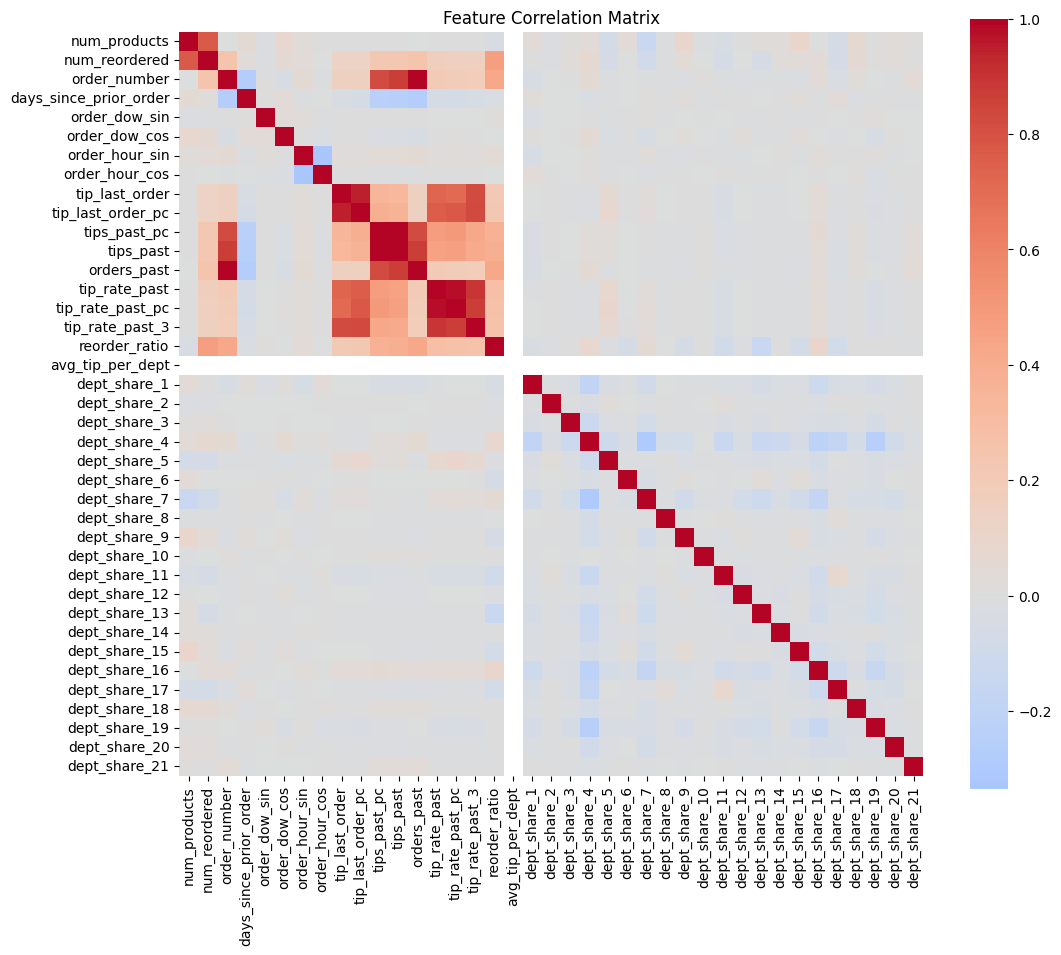

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
"""Spaßeshalber haben wir mal noch unsere Korrelation zwischen den Features ausgegeben"""

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Feature Correlation Matrix")
plt.show()
